In [1]:
%matplotlib inline

In [2]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import PIL.Image
from cStringIO import StringIO
import IPython.display

In [3]:
matplotlib.rcParams['figure.figsize'] = (9,8)

In [4]:
X = loadmat("./X.mat")

In [5]:
A = X['X']

In [6]:
A

array([[-0.80270267,  0.14826696, -0.73008652, ..., -0.38844022,
        -0.04152344,  1.95023934],
       [ 1.51626395,  1.03244736, -0.45484151, ...,  1.26987396,
         0.45179885, -0.77529334]])

In [7]:
Xi = np.array([[1,1,1],]).T

In [8]:
Xi

array([[1],
       [1],
       [1]])

In [9]:
def eigen(A, n=100):
    eest = np.zeros((n, 1))
    v = np.random.random((A.shape[1],1))
#     print eest.shape
#     print v.shape

    for i in range(n):
        x = np.dot(A,v)
        e = np.dot(x.T, v) / np.dot(v.T, v)
        v = x / np.linalg.norm(x, ord='fro')
        eest[i] = e
#     plt.plot(eest)
    return eest[n-1][0], v

In [10]:
# A = np.array([[1,2,1],[-4,7,1],[-1,-2,-1]])
# A
# np.linalg.eig(A)
# l1, v = eigen(A)
# l2,v2 = eigen(A-l1*np.dot(v,v.T))
# l2,v2

In [11]:
# A = np.array([[2,-12],[1,-5]])
# eigen(A)

In [12]:
A = X['X']
print A.shape
B = np.dot(A,A.T)
print B.shape

(2L, 1000L)
(2L, 2L)


In [13]:
l1, v1 = eigen(B)
l2, v2 = eigen(B - l1*np.dot(v1,v1.T))

In [14]:
ev = np.hstack([v1,v2])

In [15]:
l, v = np.linalg.eig(B)

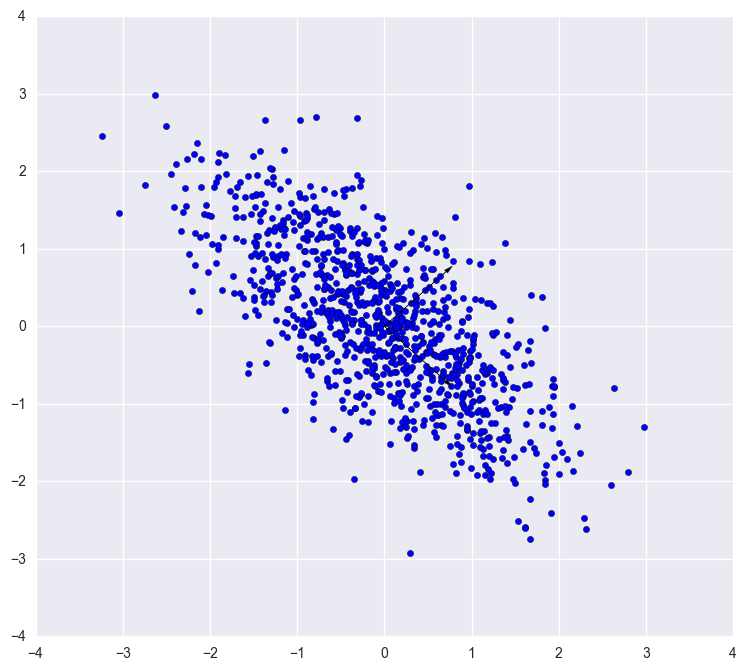

In [16]:
ax = plt.axes()
plt.scatter(A[0,:], A[1,:])
ax.arrow(0,0, v1[0][0], v1[1][0], head_width=0.05, head_length=0.1, fc='k', ec='k')
ax.arrow(0,0, v2[0][0], v2[1][0], head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.show()


In [17]:
A = loadmat('./flute.mat')['X']

In [18]:
# sns.heatmap(A)

In [19]:
A.shape

(128L, 143L)

In [20]:
n_cov = np.cov(A)
n_cov.shape

(128L, 128L)

In [25]:
l, ev = np.linalg.eig(n_cov)

In [23]:
print l.shape, ev.shape

(128L,) (128L, 128L)


In [26]:
print ev[:2, :].shape

(2L, 128L)


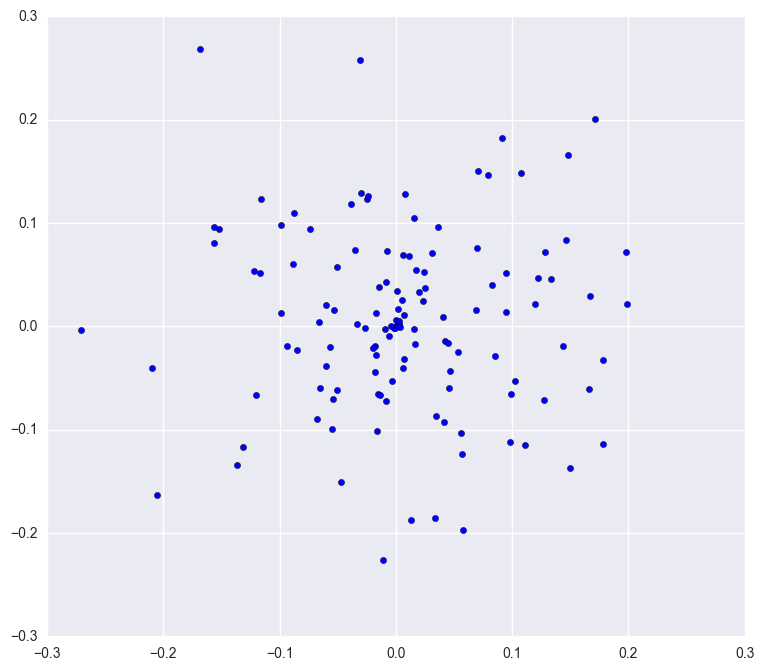

In [27]:
plt.scatter(ev[0], ev[1])

In [294]:
ev_small = ev[:2, :]

In [295]:
projected = np.dot(ev_small, A)

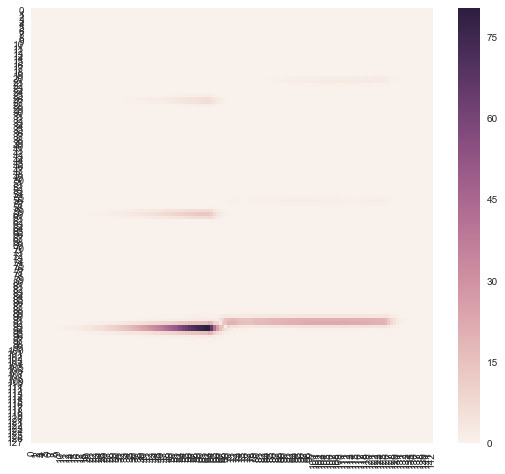

In [296]:
sns.heatmap(A)

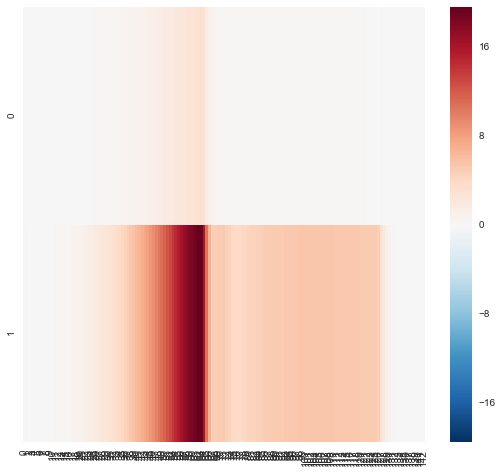

In [297]:
sns.heatmap(projected)

In [310]:
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

In [299]:
from scipy.misc import imread

In [301]:
A = imread("./sg_train.jpg")

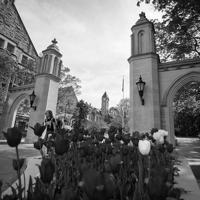

In [313]:
showarray(A)

In [323]:
A_new = A[:186, :186]

In [324]:
A_new.shape

(186, 186)

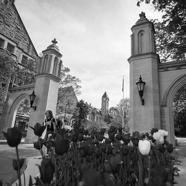

In [325]:
showarray(A_new)